### Import Relevant Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#Supressing Scientific Notation
pd.options.display.float_format = '{:20,.2f}'.format

### Loading the Data

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


### Checking Missing Values

In [3]:
raw_data.isna().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [7]:
raw_data[raw_data['author'].isna()]

,title,author,date,views,likes,link
3039,Year In Ideas 2015,NaN,December 2015,532,15,https://ted.com/talks/year_in_ideas_2015


Note : This talk has multiple speakers. Thats why the value is NaN

### Checking Duplicate Values

In [4]:
len(raw_data[raw_data.duplicated() == True])

0

### Checking Each Columns Datatypes

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [13]:
raw_data.describe()

,views,likes
count,"5,440.00","5,440.00"
mean,"2,061,575.96","62,607.62"
std,"3,567,097.77","107,646.77"
min,532.00,15.00
25%,"670,750.00","20,000.00"
50%,"1,300,000.00","40,500.00"
75%,"2,100,000.00","65,000.00"
max,"72,000,000.00","2,100,000.00"


### Dropping the missing value and unnecessary column

In [31]:
data_cleaned = raw_data.dropna()
data_cleaned = data_cleaned.drop('link',axis=1)

In [32]:
#Checking missing values
data_cleaned.isna().sum()

title     0
author    0
date      0
views     0
likes     0
dtype: int64

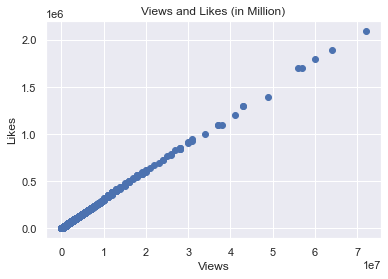

In [33]:
#Correlation between views and likes
plt.scatter(data_cleaned['views'],data_cleaned['likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views and Likes (in Million)')
plt.show()

Looks likes a straight line. Which meant that as the views goes up, the likes count goes up too!

### Extracting Year and Month from the Date Column

In [34]:
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])
data_cleaned.head()

,title,author,date,views,likes
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72


In [35]:
#Extracting the month and year from the date column. And the dropping the date column
data_cleaned['year'] = pd.DatetimeIndex(data_cleaned['date']).year
data_cleaned['month'] = pd.DatetimeIndex(data_cleaned['date']).month
data_cleaned = data_cleaned.drop('date',axis=1)
data_cleaned.head()

,title,author,views,likes,year,month
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,2021,12
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,2022,2
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,2021,9
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,2021,10
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,2021,10


In [37]:
#Rearranging the Columns
data_cleaned.columns.values

array(['title', 'author', 'views', 'likes', 'year', 'month'], dtype=object)

In [38]:
data_cleaned = data_cleaned[['title', 'author', 'month','year','likes','views']]
data_cleaned.head()

,title,author,month,year,likes,views
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,12,2021,12000,404000
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2,2022,6400,214000
2,How play can spark new ideas for your business,Martin Reeves,9,2021,12000,412000
3,Why is China appointing judges to combat clima...,James K. Thornton,10,2021,12000,427000
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,10,2021,72,2400


### Finding Average Likes and Views from Each Year

In [47]:
#Calculating how many videos are posted each year
data_cleaned['year'].value_counts()

2019    544
2020    501
2017    495
2018    473
2016    399
2021    390
2013    388
2015    376
2014    357
2012    302
2011    271
2010    267
2009    233
2007    113
2008     84
2005     65
2006     49
2003     34
2004     33
2002     26
2022     20
1998      6
2001      5
1970      2
1990      1
1994      1
1991      1
1983      1
1972      1
1984      1
Name: year, dtype: int64

In [45]:
#we can check each year like this
#Lets say we want to check TedTalks that occur in 2002
data_cleaned[data_cleaned['year'] ==  2002].describe()

,month,year,likes,views
count,26.00,26.00,26.00,26.00
mean,2.08,"2,002.00","35,219.23","1,170,846.15"
std,0.27,0.00,"36,965.74","1,221,136.97"
min,2.00,"2,002.00","6,700.00","225,000.00"
25%,2.00,"2,002.00","18,250.00","629,000.00"
50%,2.00,"2,002.00","25,000.00","858,500.00"
75%,2.00,"2,002.00","33,750.00","1,100,000.00"
max,3.00,"2,002.00","192,000.00","6,400,000.00"


- From the table above, we got that the average views for Ted Talks video in 2002 is 1,170,846. And the average likes is 35,219.

In [41]:
#or maybe more recent one, like 2018
data_cleaned[data_cleaned['year'] ==  2018].describe()

,month,year,likes,views
count,473.00,473.00,473.00,473.00
mean,7.58,"2,018.00","52,159.60","1,716,400.84"
std,3.27,0.00,"54,188.66","1,769,994.79"
min,1.00,"2,018.00",40.00,"1,300.00"
25%,4.00,"2,018.00","10,000.00","352,000.00"
50%,8.00,"2,018.00","48,000.00","1,600,000.00"
75%,11.00,"2,018.00","68,000.00","2,200,000.00"
max,12.00,"2,018.00","435,000.00","14,000,000.00"


- In 2018, the average views for each video is 1,716,400. While the average likes is 52,159

In [191]:
#making new tables
table = {'views':[],'likes':[], 'month':[],'year':[]}
average_table = pd.DataFrame(table)

In [192]:
#inputing the average data in the table
for i in range (1970,2023):
    average_table = average_table.append(data_cleaned[data_cleaned['year'] == i].mean(),ignore_index=True)
average_table.head()

C:\Users\user\AppData\Local\Temp/ipykernel_18644/784053872.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_table = average_table.append(data_cleaned[data_cleaned['year'] == i].mean(),ignore_index=True)


,views,likes,month,year,author,title
0,"126,000.00","3,750.00",1.00,"1,970.00",NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,300,000.00","41,000.00",5.00,"1,972.00",NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
#dropping author and title column
average_table = average_table.drop(['author','title','month'],axis=1)

In [194]:
#checking missing values in average_table
average_table.isna().sum()

views    23
likes    23
year     23
dtype: int64

In [195]:
average_table.isna().sum()

views    23
likes    23
year     23
dtype: int64

In [196]:
#dropping missing value
average_table = average_table.dropna()

In [197]:
#checking missing value
average_table.isna().sum()

views    0
likes    0
year     0
dtype: int64

In [198]:
#checking duplicates
len(average_table[average_table.duplicated() == True])

0

In [199]:
average_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 52
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   views   30 non-null     float64
 1   likes   30 non-null     float64
 2   year    30 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes


In [200]:
data_types = {'year':int}
average_table = average_table.astype(data_types)
average_table = average_table.reset_index()

In [201]:
average_table = average_table.drop('index',axis = 1)
average_table = average_table[['year','views','likes']]

### Visualizing Views and Likes per Year

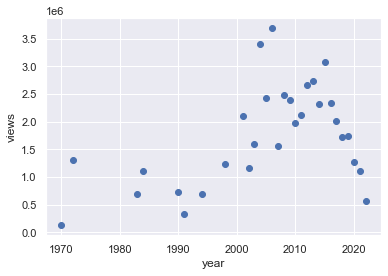

In [202]:
#scatterplot
plt.scatter(average_table['year'],average_table['views'])
plt.xlabel('year')
plt.ylabel('views')
plt.show()

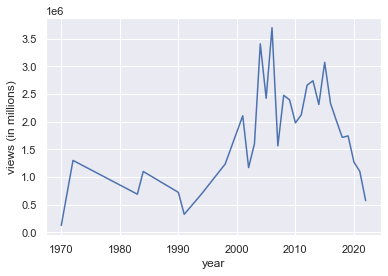

In [203]:
plt.plot(average_table['year'],average_table['views'])
plt.xlabel('year')
plt.ylabel('views (in millions)')
plt.show()

### Summary of Views

In [206]:
views_table = average_table.drop('likes',axis=1)
views_table['views'].max()

3696122.4285714286

In [240]:
max_view = views_table['views'].max()
avg_view = views_table['views'].mean()
min_view = views_table['views'].min()

In [246]:
#Printing max, avg, min views
print(f'The most view in a year for Ted Talks, with {round(max_view,1)} views.')
print(f'Average view in each year from 1970-2022 is {round(avg_view,1)} views.')
print(f'The lowest view count in a year for Ted Talks video is {min_view} views')

The most view in a year for Ted Talks, with 3696122.4 views.
Average view in each year from 1970-2022 is 1755508.4 views.
The lowest view count in a year for Ted Talks video is 126000.0 views


### When Maximum and Minimum view happens?

In [244]:
#Maximum Views
views_table[views_table['views'] == views_table['views'].max()]

,year,views
13,2006,"3,696,122.43"


In [245]:
#Minimum Views
views_table[views_table['views'] == views_table['views'].min()]

,year,views
0,1970,"126,000.00"


### 